In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('/mnt/c/Users/Irantzu/Desktop/Adalab/Módulo 4/Proyecto_Equipo-1/df_primera_limpieza.csv', index_col=0)
pd.set_option('display.max_columns', None)

In [11]:

# Suponiendo que df es tu DataFrame
num_duplicados = df.duplicated().sum()

print("Número de duplicados:", num_duplicados)

# Eliminar duplicados y actualizar el DataFrame
df = df.drop_duplicates()

# Ahora el DataFrame df no tendrá filas duplicadas


Número de duplicados: 0


**Columnas:**
- is_repeated_guest: Indica si el cliente es un huésped repetido (1) o no (0)

- previous_cancellations: Número de reservas canceladas por el cliente antes de esta reserva

- previous_bookings_not_canceled: Número de reservas no canceladas por el cliente antes de esta reserva

- reserved_room_type: Tipo de habitación reservada

- assigned_room_type: Tipo de habitación asignada en la reserva

- booking_changes: Número de cambios realizados en la reserva

- agent: Identificador del agente involucrado en la reserva

- company: Identificador de la compañía involucrada en la reserva

In [13]:

# Calcula el porcentaje de valores nulos en cada columna
porcentaje_nulos = df.isnull().mean() * 100

# Filtra las columnas que te interesan
columnas_interes = ['is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                    'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent']
porcentaje_nulos_interes = porcentaje_nulos[columnas_interes]

# Imprime el resultado
print("Porcentaje de valores nulos en las columnas de interés:")
print(porcentaje_nulos_interes)


Porcentaje de valores nulos en las columnas de interés:
is_repeated_guest                  4.247278
previous_cancellations            36.319647
previous_bookings_not_canceled     0.000000
reserved_room_type                33.733316
assigned_room_type                 0.000000
booking_changes                    0.000000
agent                             13.685861
dtype: float64


In [3]:
porcentaje_aparicion = df['assigned_room_type'].value_counts(normalize=True)

# Valores para imputar
valor1 = 'A'
valor2 = 'D'

# Porcentajes de aparición de los valores
porcentaje_valor1 = porcentaje_aparicion.get(valor1, 0)
porcentaje_valor2 = porcentaje_aparicion.get(valor2, 0)

# Imputar valores nulos basados en los porcentajes
for i, valor in enumerate(df['assigned_room_type']):
    if pd.isnull(valor):
        # Generar un número aleatorio entre 0 y 1
        rand = np.random.rand()
        if rand < porcentaje_valor1:
            df.loc[i, 'assigned_room_type'] = valor1
        else:
            df.loc[i, 'assigned_room_type'] = valor2

display(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,0
0,Resort Hotel,False,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,NaN,0.0,BB,PRT,NaN,Direct,0.0,NaN,0.0,C,C,3.0,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01 00:00:00,NaN
1,Resort Hotel,False,737.0,NaN,July,27.0,1.0,0.0,0.0,2.0,NaN,0.0,BB,NaN,NaN,Direct,0.0,0.0,0.0,NaN,C,4.0,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01 00:00:00,NaN
2,Resort Hotel,False,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,NaN,Direct,0.0,0.0,0.0,A,C,0.0,NaN,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02 00:00:00,NaN
3,Resort Hotel,False,13.0,NaN,July,27.0,1.0,0.0,1.0,1.0,NaN,0.0,BB,GBR,Corporate,Corporate,0.0,0.0,0.0,A,A,0.0,304.0,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02 00:00:00,NaN
4,Resort Hotel,False,14.0,NaN,July,NaN,1.0,0.0,2.0,2.0,NaN,0.0,BB,NaN,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,240.0,NaN,0.0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23.0,2017.0,August,35.0,30.0,2.0,5.0,2.0,0.0,0.0,BB,NaN,Offline TA/TO,TA/TO,0.0,0.0,0.0,A,A,0.0,394.0,NaN,0.0,NaN,96.14,0.0,0.0,Check-Out,2017-06-09 00:00:00,NaN
119386,City Hotel,False,102.0,NaN,August,35.0,31.0,2.0,5.0,3.0,NaN,0.0,BB,FRA,NaN,TA/TO,0.0,NaN,0.0,E,E,0.0,9.0,NaN,0.0,Transient,225.43,0.0,2.0,Check-Out,2017-07-09 00:00:00,NaN
119387,City Hotel,False,34.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,NaN,0.0,BB,NaN,Online TA,TA/TO,0.0,0.0,0.0,NaN,D,0.0,9.0,NaN,0.0,Transient,157.71,0.0,4.0,Check-Out,2017-07-09 00:00:00,NaN
119388,City Hotel,False,109.0,NaN,August,35.0,31.0,2.0,5.0,55.0,0.0,0.0,BB,NaN,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,89.0,NaN,0.0,Transient,104.40,0.0,0.0,Check-Out,2017-07-09 00:00:00,NaN


In [9]:
df['assigned_room_type'].value_counts()

A    73007
D    25618
E     7744
F     3697
G     2528
C     2366
B     2152
H      712
I      363
K      267
P       12
L        1
Name: assigned_room_type, dtype: int64

In [49]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', '0'],
      dtype='object')

- Cambiamos los valores de 'repeted' a 'Recurrent' y 'First time' o 'nan'

In [50]:
df['is_repeated_guest'].unique()

array([ 0., nan,  1.])

In [51]:
# Cambiamos los valores de 'repeted'
repeted = {1 :'True', 0 : 'False', np.nan : np.nan}
df["is_repeated_guest"]=df["is_repeated_guest"].map(repeted)
df['is_repeated_guest'].unique()

array(['First time', nan, 'Recurrent'], dtype=object)

In [52]:
nulos = df['is_repeated_guest'].isnull().mean() * 100

print("Porcentaje de valores nulos por columna:")
print(nulos)


Porcentaje de valores nulos por columna:
5.711090898470422


- Convertir las columnas a tipo Int64 si todos los valores son enteros ('previous_cancellations', 'previous_bookings_not_canceled', 'agent')


In [53]:
# Convertir las columnas a tipo Int64 si todos los valores son enteros

cols_to_convert = ['previous_cancellations', 'previous_bookings_not_canceled', 'agent', 'booking_changes' ]

for col in cols_to_convert:
    df[col] = df[col].fillna(0).astype(int)

In [54]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,0
0,Resort Hotel,False,342.000000,2015.0,July,27.0,1.0,0.000000,0.000000,2.0,NaN,0.0,BB,PRT,NaN,Direct,First time,0,0,C,C,3,0,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00,NaN
1,Resort Hotel,False,737.000000,NaN,July,27.0,1.0,0.000000,0.000000,2.0,NaN,0.0,BB,NaN,NaN,Direct,First time,0,0,NaN,C,4,0,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00,NaN
2,Resort Hotel,False,7.000000,2015.0,July,27.0,1.0,0.000000,1.000000,1.0,0.0,0.0,BB,GBR,NaN,Direct,First time,0,0,A,C,0,0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02 00:00:00,NaN
3,Resort Hotel,False,13.000000,NaN,July,27.0,1.0,0.000000,1.000000,1.0,NaN,0.0,BB,GBR,Corporate,Corporate,First time,0,0,A,A,0,304,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02 00:00:00,NaN
4,Resort Hotel,False,14.000000,NaN,July,NaN,1.0,0.000000,2.000000,2.0,NaN,0.0,BB,NaN,Online TA,TA/TO,First time,0,0,A,A,0,240,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182872,NaN,NaN,224.337762,NaN,NaN,NaN,NaN,19.005545,19.819823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182873,NaN,NaN,390.141963,NaN,NaN,NaN,NaN,14.751794,19.989726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182874,NaN,NaN,230.689826,NaN,NaN,NaN,NaN,11.409496,20.461372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182875,NaN,NaN,304.888534,NaN,NaN,NaN,NaN,16.744472,15.400773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df['booking_changes']

0         3
1         4
2         0
3         0
4         0
         ..
182872    0
182873    0
182874    0
182875    0
182876    0
Name: booking_changes, Length: 119837, dtype: int64

In [56]:
df['agent'].unique()

array([  0, 304, 240, 303,  15, 241,   8, 250, 115,   5, 175, 134, 156,
       243, 242,   3, 105,  40, 147, 306, 184,  96,   2, 127,  95, 146,
         9, 177,   6, 143, 244, 149, 167, 300, 171, 305,  67, 196, 152,
       142, 261, 104,  36,  26,  29, 258, 110,  71, 181,  88, 251, 275,
        69, 248, 208, 256, 314, 126, 281, 273, 253, 185, 330, 334, 328,
       326, 321, 324, 313,  38, 155,  68, 335, 308, 332,  94, 348, 310,
       339, 375,  66, 327, 387, 298,  91, 245, 385, 257, 393, 168, 405,
       249, 315,  75, 128, 307,  11, 436,   1, 201, 183, 223, 368, 336,
       291, 464, 411, 481,  10, 154, 468, 410, 390, 440, 495, 492, 493,
       434,  57, 531, 420, 483, 526, 472, 429,  16, 446,  34,  78, 139,
       252, 270,  47, 114, 301, 193, 182, 135, 350, 195, 352, 355, 159,
       363, 384, 360, 331, 367,  64, 406, 163, 414, 333, 427, 431, 430,
       426, 438, 433, 418, 441, 282, 432,  72, 450, 180, 454, 455,  59,
       451, 254, 358, 469, 165, 467, 510, 337, 476, 502, 527, 47

In [57]:
df['previous_cancellations']

0         0
1         0
2         0
3         0
4         0
         ..
182872    0
182873    0
182874    0
182875    0
182876    0
Name: previous_cancellations, Length: 119837, dtype: int64

In [58]:
df['previous_cancellations'].unique()

array([ 0, 14, 10, 19, 13, 17,  1,  2,  3, 26, 25,  4, 24, 12, 16,  5, 11,
       15, 18, 21,  6])

In [59]:
df['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [60]:
df['previous_bookings_not_canceled'].value_counts()/df.shape[0]*100

0     96.979230
1      1.286748
2      0.483991
3      0.277877
4      0.191093
        ...    
47     0.000834
49     0.000834
50     0.000834
51     0.000834
72     0.000834
Name: previous_bookings_not_canceled, Length: 73, dtype: float64

- Vamos a crear una nueva columna para ver si coinciden o no ambas reservas:

In [61]:
df_rooms = df[['reserved_room_type', 'assigned_room_type']][df['reserved_room_type'].notna()&df['assigned_room_type'].notna()]
df_rooms

,reserved_room_type,assigned_room_type
0,C,C
2,A,C
3,A,A
4,A,A
5,A,A
...,...,...
119382,G,G
119384,A,A
119385,A,A
119386,E,E


In [62]:
df['reserved_room_type'].unique()

array(['C', nan, 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'],
      dtype=object)

In [63]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K', nan],
      dtype=object)

In [64]:
df['cambio_habitac'] = np.where(df['reserved_room_type']== df['assigned_room_type'], 'equal', 'change')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,0,cambio_habitac
0,Resort Hotel,False,342.000000,2015.0,July,27.0,1.0,0.000000,0.000000,2.0,NaN,0.0,BB,PRT,NaN,Direct,First time,0,0,C,C,3,0,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00,NaN,equal
1,Resort Hotel,False,737.000000,NaN,July,27.0,1.0,0.000000,0.000000,2.0,NaN,0.0,BB,NaN,NaN,Direct,First time,0,0,NaN,C,4,0,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00,NaN,change
2,Resort Hotel,False,7.000000,2015.0,July,27.0,1.0,0.000000,1.000000,1.0,0.0,0.0,BB,GBR,NaN,Direct,First time,0,0,A,C,0,0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02 00:00:00,NaN,change
3,Resort Hotel,False,13.000000,NaN,July,27.0,1.0,0.000000,1.000000,1.0,NaN,0.0,BB,GBR,Corporate,Corporate,First time,0,0,A,A,0,304,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02 00:00:00,NaN,equal
4,Resort Hotel,False,14.000000,NaN,July,NaN,1.0,0.000000,2.000000,2.0,NaN,0.0,BB,NaN,Online TA,TA/TO,First time,0,0,A,A,0,240,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03 00:00:00,NaN,equal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182872,NaN,NaN,224.337762,NaN,NaN,NaN,NaN,19.005545,19.819823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,change
182873,NaN,NaN,390.141963,NaN,NaN,NaN,NaN,14.751794,19.989726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,change
182874,NaN,NaN,230.689826,NaN,NaN,NaN,NaN,11.409496,20.461372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,change
182875,NaN,NaN,304.888534,NaN,NaN,NaN,NaN,16.744472,15.400773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,change


In [65]:
df['cambio_habitac'].value_counts()/df.shape[0]*100

equal     56.867245
change    43.132755
Name: cambio_habitac, dtype: float64

In [66]:
df['booking_changes'].value_counts()/df.shape[0]*100

0     84.878627
1     10.564350
2      3.169305
3      0.773551
4      0.313760
5      0.098467
6      0.052571
7      0.025868
10     0.015020
8      0.014186
17     0.014186
15     0.011683
11     0.011683
12     0.010014
13     0.010014
16     0.009179
14     0.008345
9      0.006676
19     0.005841
18     0.005007
20     0.000834
21     0.000834
Name: booking_changes, dtype: float64

In [ ]:
# eliminar la columna company por el alto % de nulos (96.74%)
df = df.drop(columns=['company'])

In [ ]:
# eliminar la columna 'reserved_room_type'
df = df.drop(columns=['reserved_room_type'])

In [68]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,0,cambio_habitac
0,Resort Hotel,False,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,NaN,0.0,BB,PRT,NaN,Direct,First time,0,0,C,C,3,0,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00,NaN,equal
1,Resort Hotel,False,737.0,NaN,July,27.0,1.0,0.0,0.0,2.0,NaN,0.0,BB,NaN,NaN,Direct,First time,0,0,NaN,C,4,0,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00,NaN,change
2,Resort Hotel,False,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,NaN,Direct,First time,0,0,A,C,0,0,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02 00:00:00,NaN,change
3,Resort Hotel,False,13.0,NaN,July,27.0,1.0,0.0,1.0,1.0,NaN,0.0,BB,GBR,Corporate,Corporate,First time,0,0,A,A,0,304,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02 00:00:00,NaN,equal
4,Resort Hotel,False,14.0,NaN,July,NaN,1.0,0.0,2.0,2.0,NaN,0.0,BB,NaN,Online TA,TA/TO,First time,0,0,A,A,0,240,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03 00:00:00,NaN,equal


In [ ]:
df = df.drop(columns=['0'])


In [70]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'cambio_habitac'],
      dtype='object')

# Unknown

In [74]:
columnas = ["agent"]

In [75]:
def fillna_unknown(df, columnas):
    for columna in columnas:
        df[columna] = df[columna].fillna("Unknown")
    return df

In [76]:
fillna_unknown(df, columnas)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,cambio_habitac
0,Resort Hotel,False,342.000000,2015.0,July,27.0,1.0,0.000000,0.000000,2.0,NaN,0.0,BB,PRT,NaN,Direct,First time,0,0,C,C,3,0,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00,equal
1,Resort Hotel,False,737.000000,NaN,July,27.0,1.0,0.000000,0.000000,2.0,NaN,0.0,BB,NaN,NaN,Direct,First time,0,0,Unknown,C,4,0,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00,change
2,Resort Hotel,False,7.000000,2015.0,July,27.0,1.0,0.000000,1.000000,1.0,0.0,0.0,BB,GBR,NaN,Direct,First time,0,0,A,C,0,0,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02 00:00:00,change
3,Resort Hotel,False,13.000000,NaN,July,27.0,1.0,0.000000,1.000000,1.0,NaN,0.0,BB,GBR,Corporate,Corporate,First time,0,0,A,A,0,304,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02 00:00:00,equal
4,Resort Hotel,False,14.000000,NaN,July,NaN,1.0,0.000000,2.000000,2.0,NaN,0.0,BB,NaN,Online TA,TA/TO,First time,0,0,A,A,0,240,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03 00:00:00,equal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182872,NaN,NaN,224.337762,NaN,NaN,NaN,NaN,19.005545,19.819823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Unknown,Unknown,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,change
182873,NaN,NaN,390.141963,NaN,NaN,NaN,NaN,14.751794,19.989726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Unknown,Unknown,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,change
182874,NaN,NaN,230.689826,NaN,NaN,NaN,NaN,11.409496,20.461372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Unknown,Unknown,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,change
182875,NaN,NaN,304.888534,NaN,NaN,NaN,NaN,16.744472,15.400773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Unknown,Unknown,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,change


----

**H0:** Existe una relación entre la asiduidad del huésped y sus cancelaciones.

**H1:** No existe evidencia para afirmar que existe una relación entre la asiduidad del huésped y sus cancelaciones.


In [8]:
import pandas as pd
from scipy.stats import chi2_contingency


# Crear una tabla de contingencia entre 'is_repeated_guest' y 'is_cancelled'
tabla_contingencia = pd.crosstab(df['is_repeated_guest'], df['is_canceled'])

# Realizar el test de independencia Chi-cuadrado
chi2, p_valor, _, _ = chi2_contingency(tabla_contingencia)

# Imprimir el resultado del test
print("Resultado del test de independencia Chi-cuadrado:")
print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p_valor}")

# Comparar el valor p con un nivel de significancia (por ejemplo, 0.05) para tomar una decisión sobre las hipótesis
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Se rechaza la hipótesis nula (H0). Hay evidencia suficiente para afirmar que existe una relación entre la asiduidad del huésped y sus cancelaciones.")
else:
    print("No se puede rechazar la hipótesis nula (H0). No hay suficiente evidencia para afirmar que existe una relación entre la asiduidad del huésped y sus cancelaciones.")


Resultado del test de independencia Chi-cuadrado:
Estadístico Chi-cuadrado: 795.2482262180265
Valor p: 5.823527174943513e-175
Se rechaza la hipótesis nula (H0). Hay evidencia suficiente para afirmar que existe una relación entre la asiduidad del huésped y sus cancelaciones.


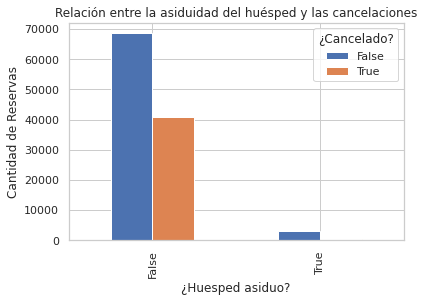

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una tabla de contingencia entre 'is_repeated_guest' y 'is_cancelled'
tabla_contingencia = pd.crosstab(df['is_repeated_guest'], df['is_canceled'])

# Crear un gráfico de barras agrupadas
sns.set(style="whitegrid")
tabla_contingencia.plot(kind='bar')
plt.title('Relación entre la asiduidad del huésped y las cancelaciones')
plt.xlabel('¿Huesped asiduo?')
plt.ylabel('Cantidad de Reservas')
plt.legend(title='¿Cancelado?', loc='upper right')
plt.show()


**H0:** No hay diferencia en el número de cancelaciones anteriores entre los huéspedes repetidos y los no repetidos.

**H1:** Existe una diferencia en el número de cancelaciones anteriores entre los huéspedes repetidos y los no repetidos.

El test de t de Student nos permite calcular un valor p que indica la probabilidad de observar una diferencia en las medias de las muestras tan grande o mayor que la observada si la diferencia real entre las poblaciones de las que se extrajeron las muestras es cero (es decir, si la hipótesis nula es cierta).

In [14]:
from scipy.stats import ttest_ind

# Filtrar el dataframe para obtener solo los huéspedes repetidos y no repetidos
repetidos = df[df['is_repeated_guest'] == 1]['previous_cancellations']
no_repetidos = df[df['is_repeated_guest'] == 0]['previous_cancellations']

# Realizar el test de t de Student independiente
t_stat, p_valor = ttest_ind(repetidos, no_repetidos)

# Imprimir el resultado del test
print("Resultado del test de t de Student independiente:")
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_valor}")

# Comparar el valor p con un nivel de significancia (por ejemplo, 0.05) para tomar una decisión sobre las hipótesis
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Se rechaza la hipótesis nula (H0). Hay evidencia suficiente para afirmar que existe una diferencia significativa en el número de cancelaciones anteriores entre los huéspedes repetidos y los no repetidos.")
else:
    print("No se puede rechazar la hipótesis nula (H0). No hay suficiente evidencia para afirmar que existe una diferencia significativa en el número de cancelaciones anteriores entre los huéspedes repetidos y los no repetidos.")


Resultado del test de t de Student independiente:
Estadístico t: nan
Valor p: nan
No se puede rechazar la hipótesis nula (H0). No hay suficiente evidencia para afirmar que existe una diferencia significativa en el número de cancelaciones anteriores entre los huéspedes repetidos y los no repetidos.


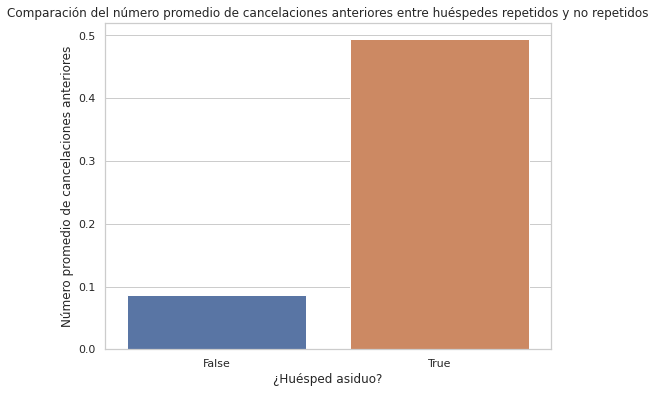

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el número promedio de cancelaciones anteriores para cada grupo
promedio_cancelaciones = df.groupby('is_repeated_guest')['previous_cancellations'].mean().reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='is_repeated_guest', y='previous_cancellations', data=promedio_cancelaciones)
plt.title('Comparación del número promedio de cancelaciones anteriores entre huéspedes repetidos y no repetidos')
plt.xlabel('¿Huésped asiduo?')
plt.ylabel('Número promedio de cancelaciones anteriores')
plt.show()


**H0:** Existe relación entre el numero de cancelaciones y el país

**H1:** No existe relación entre las cancelaciones y el país de los huéspedes

In [17]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia entre 'country' y 'previous_cancellations'
tabla_contingencia = pd.crosstab(df['country'], df['previous_cancellations'])

# Realizar el test de independencia chi-cuadrado
chi2, p_valor, _, _ = chi2_contingency(tabla_contingencia)

# Imprimir el resultado del test
print("Resultado del test de independencia Chi-cuadrado:")
print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p_valor}")

# Comparar el valor p con un nivel de significancia (por ejemplo, 0.05) para tomar una decisión sobre las hipótesis
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Se rechaza la hipótesis nula (H0). Existe una relación significativa entre el número de cancelaciones y el país de los huéspedes.")
else:
    print("No se puede rechazar la hipótesis nula (H0). No hay suficiente evidencia para afirmar que existe una relación significativa entre el número de cancelaciones y el país de los huéspedes.")


Resultado del test de independencia Chi-cuadrado:
Estadístico Chi-cuadrado: 4724.003569517354
Valor p: 4.786829611876128e-83
Se rechaza la hipótesis nula (H0). Existe una relación significativa entre el número de cancelaciones y el país de los huéspedes.


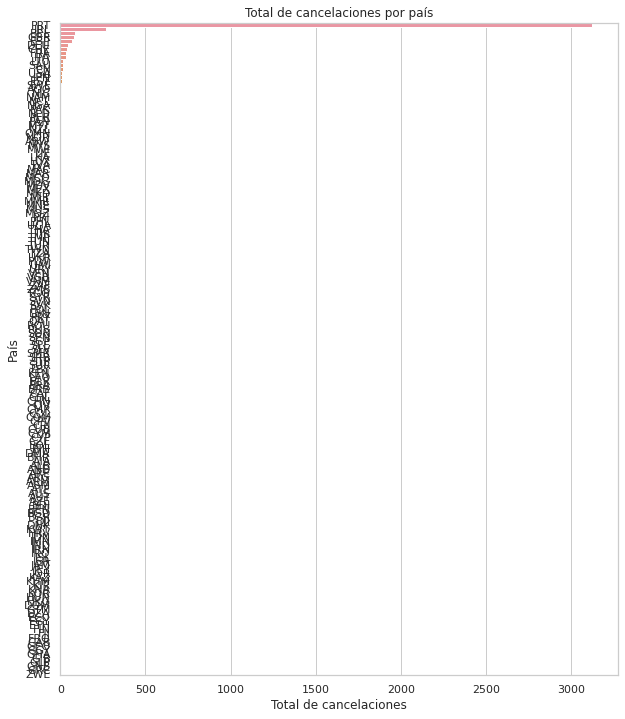

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el total de cancelaciones para cada país
cancelaciones_por_pais = df.groupby('country')['previous_cancellations'].sum().reset_index()

# Ordenar los países por la cantidad total de cancelaciones
cancelaciones_por_pais = cancelaciones_por_pais.sort_values(by='previous_cancellations', ascending=False)

# Crear un gráfico de barras horizontal
plt.figure(figsize=(10, 12))
sns.barplot(x='previous_cancellations', y='country', data=cancelaciones_por_pais)
plt.title('Total de cancelaciones por país')
plt.xlabel('Total de cancelaciones')
plt.ylabel('País')
plt.show()


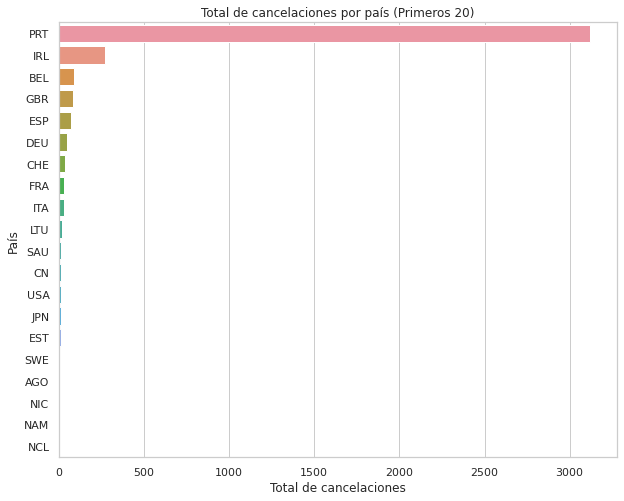

In [20]:

# Calcular el total de cancelaciones para cada país
cancelaciones_por_pais = df.groupby('country')['previous_cancellations'].sum().reset_index()

# Ordenar los países por la cantidad total de cancelaciones y tomar los primeros 20
cancelaciones_por_pais = cancelaciones_por_pais.sort_values(by='previous_cancellations', ascending=False).head(20)

# Crear un gráfico de barras horizontal
plt.figure(figsize=(10, 8))
sns.barplot(x='previous_cancellations', y='country', data=cancelaciones_por_pais)
plt.title('Total de cancelaciones por país (Primeros 20)')
plt.xlabel('Total de cancelaciones')
plt.ylabel('País')
plt.show()
